# 1.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import metrics as mt

# 2.0 Classification Algorithms

## 2.1 Functions

In [2]:
def calc_metrics(model, y_train, y_pred):
    model = [model]
    accuracy = mt.accuracy_score( y_train, y_pred )
    precision = mt.precision_score(y_train, y_pred)
    recall = mt.recall_score(y_train, y_pred)
    f1 = mt.f1_score(y_train, y_pred)
    
    d = {'ml_model': model, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1_score':f1}
    
    metrics = pd.DataFrame(data=d)
    
    return metrics

## 2.2 Importing Libraries for Classification

In [59]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
from sklearn import tree as tr

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Logistic Regression
from sklearn.linear_model import LogisticRegression

## 2.3 Loading dataset

In [4]:
# Training data
X_train = pd.read_csv('datasets/pa_datasets/classification/X_training.csv')
y_train = pd.read_csv('datasets/pa_datasets/classification/y_training.csv')

# Validation data
X_val = pd.read_csv('datasets/pa_datasets/classification/X_validation.csv')
y_val = pd.read_csv('datasets/pa_datasets/classification/y_validation.csv')

# Test data
X_test = pd.read_csv('datasets/pa_datasets/classification/X_test.csv')
y_test = pd.read_csv('datasets/pa_datasets/classification/y_test.csv')

## 2.4 Checking datasets

In [5]:
X_train.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.00,0.6,0.4,0.000000,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.50,0.2,0.6,0.000000,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.00,0.6,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
3,48280,1,0.589744,0.5,0.041397,0.6,1.0,0.6,0.6,0.8,...,0.0,1.00,0.4,0.4,0.029499,0.020772,1.0,0.0,0.0,1.0
4,472,0,0.423077,1.0,0.016559,0.2,0.2,0.2,0.8,0.6,...,1.0,0.75,0.8,0.6,0.021632,0.019782,0.0,1.0,1.0,0.0


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 72515 non-null  int64  
 1   customer_type                      72515 non-null  int64  
 2   age                                72515 non-null  float64
 3   class                              72515 non-null  float64
 4   flight_distance                    72515 non-null  float64
 5   inflight_wifi_service              72515 non-null  float64
 6   departure_arrival_time_convenient  72515 non-null  float64
 7   ease_of_online_booking             72515 non-null  float64
 8   gate_location                      72515 non-null  float64
 9   food_and_drink                     72515 non-null  float64
 10  online_boarding                    72515 non-null  float64
 11  seat_comfort                       72515 non-null  flo

In [7]:
X_train.columns

Index(['id', 'customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel'],
      dtype='object')

In [8]:
y_train.head()

,0
0,1
1,1
2,0
3,0
4,0


In [9]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       72515 non-null  int64
dtypes: int64(1)
memory usage: 566.7 KB


In [10]:
X_val.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,75635,1,0.525641,1.0,0.714055,1.0,1.0,1.0,1.0,0.8,...,0.75,0.75,0.8,0.8,0.000000,0.000000,0.0,1.0,1.0,0.0
1,106136,1,0.615385,1.0,0.054725,0.4,1.0,1.0,1.0,0.4,...,0.25,0.00,0.4,0.6,0.004916,0.004946,0.0,1.0,1.0,0.0
2,94469,1,0.435897,1.0,0.342690,0.0,0.2,0.2,0.6,0.8,...,0.25,0.75,0.4,0.6,0.004916,0.000000,1.0,0.0,1.0,0.0
3,42104,1,0.615385,1.0,0.649838,1.0,1.0,0.6,1.0,1.0,...,0.75,0.75,0.8,0.8,0.000000,0.000989,1.0,0.0,1.0,0.0
4,78762,1,0.282051,0.0,0.100363,0.4,0.6,0.6,0.6,0.4,...,0.75,0.75,0.6,0.4,0.093412,0.090010,0.0,1.0,1.0,0.0


In [11]:
y_val.head()

,0
0,1
1,0
2,1
3,1
4,0


In [12]:
X_test.head()

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,19556,1,0.576923,0.0,0.026050,1.0,0.8,0.6,0.8,0.6,...,1.00,0.25,1.0,1.0,0.049164,0.043521,1.0,0.0,1.0,0.0
1,90035,1,0.371795,1.0,0.571890,0.2,0.2,0.6,0.2,1.0,...,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0,0.0,1.0,0.0
2,12360,0,0.166667,0.0,0.032512,0.4,0.0,0.4,0.8,0.4,...,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0,1.0,1.0,0.0
3,77959,1,0.474359,1.0,0.675687,0.0,0.0,0.0,0.4,0.6,...,0.00,0.50,0.2,0.8,0.000000,0.005935,0.0,1.0,1.0,0.0
4,36875,1,0.538462,0.0,0.232431,0.4,0.6,0.8,0.6,0.8,...,0.25,0.75,0.4,0.8,0.000000,0.019782,1.0,0.0,1.0,0.0


In [13]:
y_test.head()

,0
0,1
1,1
2,0
3,1
4,1


## 2.5 KNN

### 2.5.1 Feature Selection

In [14]:
knn_features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

label = y_train

knn_X_train = X_train.loc[:, knn_features]
knn_y_train = label.values

### 2.5.2 Training

In [15]:
# Trying different k numbers
k_list = np.arange(3, 22, 2)
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in k_list:
    print(f'K Number: {i}')
    knn_classifier = KNeighborsClassifier( n_neighbors = i )
    knn_classifier.fit( knn_X_train, knn_y_train.ravel() )
    knn_y_pred = knn_classifier.predict( knn_X_train )
    
    accuracy = mt.accuracy_score( knn_y_train, knn_y_pred )
    precision = mt.precision_score(knn_y_train, knn_y_pred)
    recall = mt.recall_score(knn_y_train, knn_y_pred)
    f1 = mt.f1_score(knn_y_train, knn_y_pred )
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1} \n')
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

K Number: 3
Accuracy: 0.9570157898365855
Precision: 0.9731907070031757
Recall: 0.9263395698103601
F1 Score: 0.9491873563405768 

K Number: 5
Accuracy: 0.9475832586361442
Precision: 0.9700867789688616
Recall: 0.9070255822833142
F1 Score: 0.9374969167776627 

K Number: 7
Accuracy: 0.943018685789147
Precision: 0.9685847696216439
Recall: 0.8976390479826906
F1 Score: 0.9317633847474981 

K Number: 9
Accuracy: 0.9395573329655933
Precision: 0.9678580078192576
Recall: 0.8900980017818506
F1 Score: 0.9273507815219374 

K Number: 11
Accuracy: 0.9371026684134317
Precision: 0.9664247769174682
Recall: 0.885643375334097
F1 Score: 0.9242723604907935 

K Number: 13
Accuracy: 0.9347996966144936
Precision: 0.9649947753396029
Recall: 0.8815387552500955
F1 Score: 0.9213808241045596 

K Number: 15
Accuracy: 0.9340550230986693
Precision: 0.9645721458958086
Recall: 0.8801705485554283
F1 Score: 0.9204405550194656 

K Number: 17
Accuracy: 0.9326070468178997
Precision: 0.9633716261042634
Recall: 0.87787959781086

In [16]:
k_performance = {'k':k_list, 'accuracy':accuracy_list, 'precision':precision_list,
                 'recall':recall_list, 'f1_score':f1_list}

k_perf_df = pd.DataFrame(data=k_performance)
k_perf_df

,k,accuracy,precision,recall,f1_score
0,3,0.957016,0.973191,0.926340,0.949187
1,5,0.947583,0.970087,0.907026,0.937497
2,7,0.943019,0.968585,0.897639,0.931763
3,9,0.939557,0.967858,0.890098,0.927351
4,11,0.937103,0.966425,0.885643,0.924272
5,13,0.934800,0.964995,0.881539,0.921381
6,15,0.934055,0.964572,0.880171,0.920441
7,17,0.932607,0.963372,0.877880,0.918641
8,19,0.931573,0.962143,0.876607,0.917385
9,21,0.930952,0.961922,0.875334,0.916588


<Figure size 1200x1000 with 0 Axes>

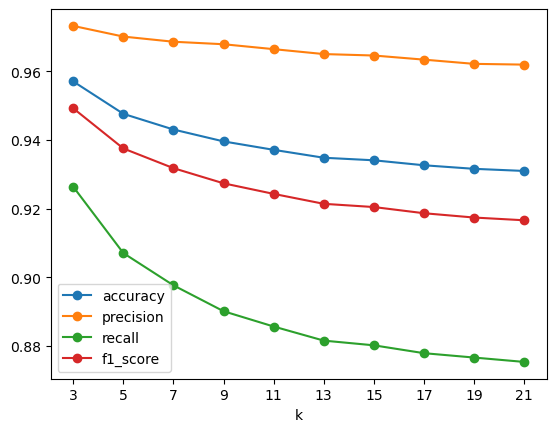

In [17]:
plt.figure(figsize=(12,10));

fig, ax = plt.subplots();
k_perf_df.plot(x="k", y="accuracy", marker="o", ax=ax);
k_perf_df.plot(x="k", y="precision", marker="o", ax=ax);
k_perf_df.plot(x="k", y="recall", marker="o", ax=ax);
k_perf_df.plot(x="k", y="f1_score", marker="o", ax=ax);

ax.set_xticks(np.arange(3, 22, 2));

In [18]:
# The algorithm performs better with k = 3 
k = 3
knn_classifier = KNeighborsClassifier( n_neighbors = k)

# treinamento do algoritmo
knn_classifier.fit( knn_X_train, knn_y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn_y_pred = knn_classifier.predict(knn_X_train)

In [20]:
knn_metrics = calc_metrics('knn', knn_y_train, knn_y_pred)

In [21]:
knn_metrics

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.957016,0.973191,0.92634,0.949187


### 2.5.3 Validation

In [22]:
knn_X_val = X_val.loc[:, knn_features]
knn_y_val = y_val.values

In [23]:
knn_y_val_pred = knn_classifier.predict(knn_X_val)

In [24]:
knn_val_metrics = calc_metrics('knn', knn_y_val, knn_y_val_pred)

In [25]:
knn_val_metrics

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.923517,0.942547,0.876977,0.90858


### 2.5.4 Test

In [26]:
knn_X_test = X_test.loc[:, knn_features]
knn_y_test = y_test.values

In [27]:
knn_y_test_pred = knn_classifier.predict(knn_X_test)

In [28]:
knn_test_metrics = calc_metrics('knn', knn_y_test, knn_y_test_pred)

In [29]:
knn_test_metrics

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.924613,0.942715,0.88183,0.911257


## 2.6 Decision Tree

### 2.6.1 Training

In [30]:
dt_features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

dt_label = y_train

dt_X_train = X_train.loc[:, dt_features]
dt_y_train = dt_label.values

In [31]:
# define model
model_tree = tr.DecisionTreeClassifier(max_depth=25) # max depth = 25 has a good result on metrics, pretty close to 30.

# training
dt_clf = model_tree.fit(dt_X_train, dt_y_train)

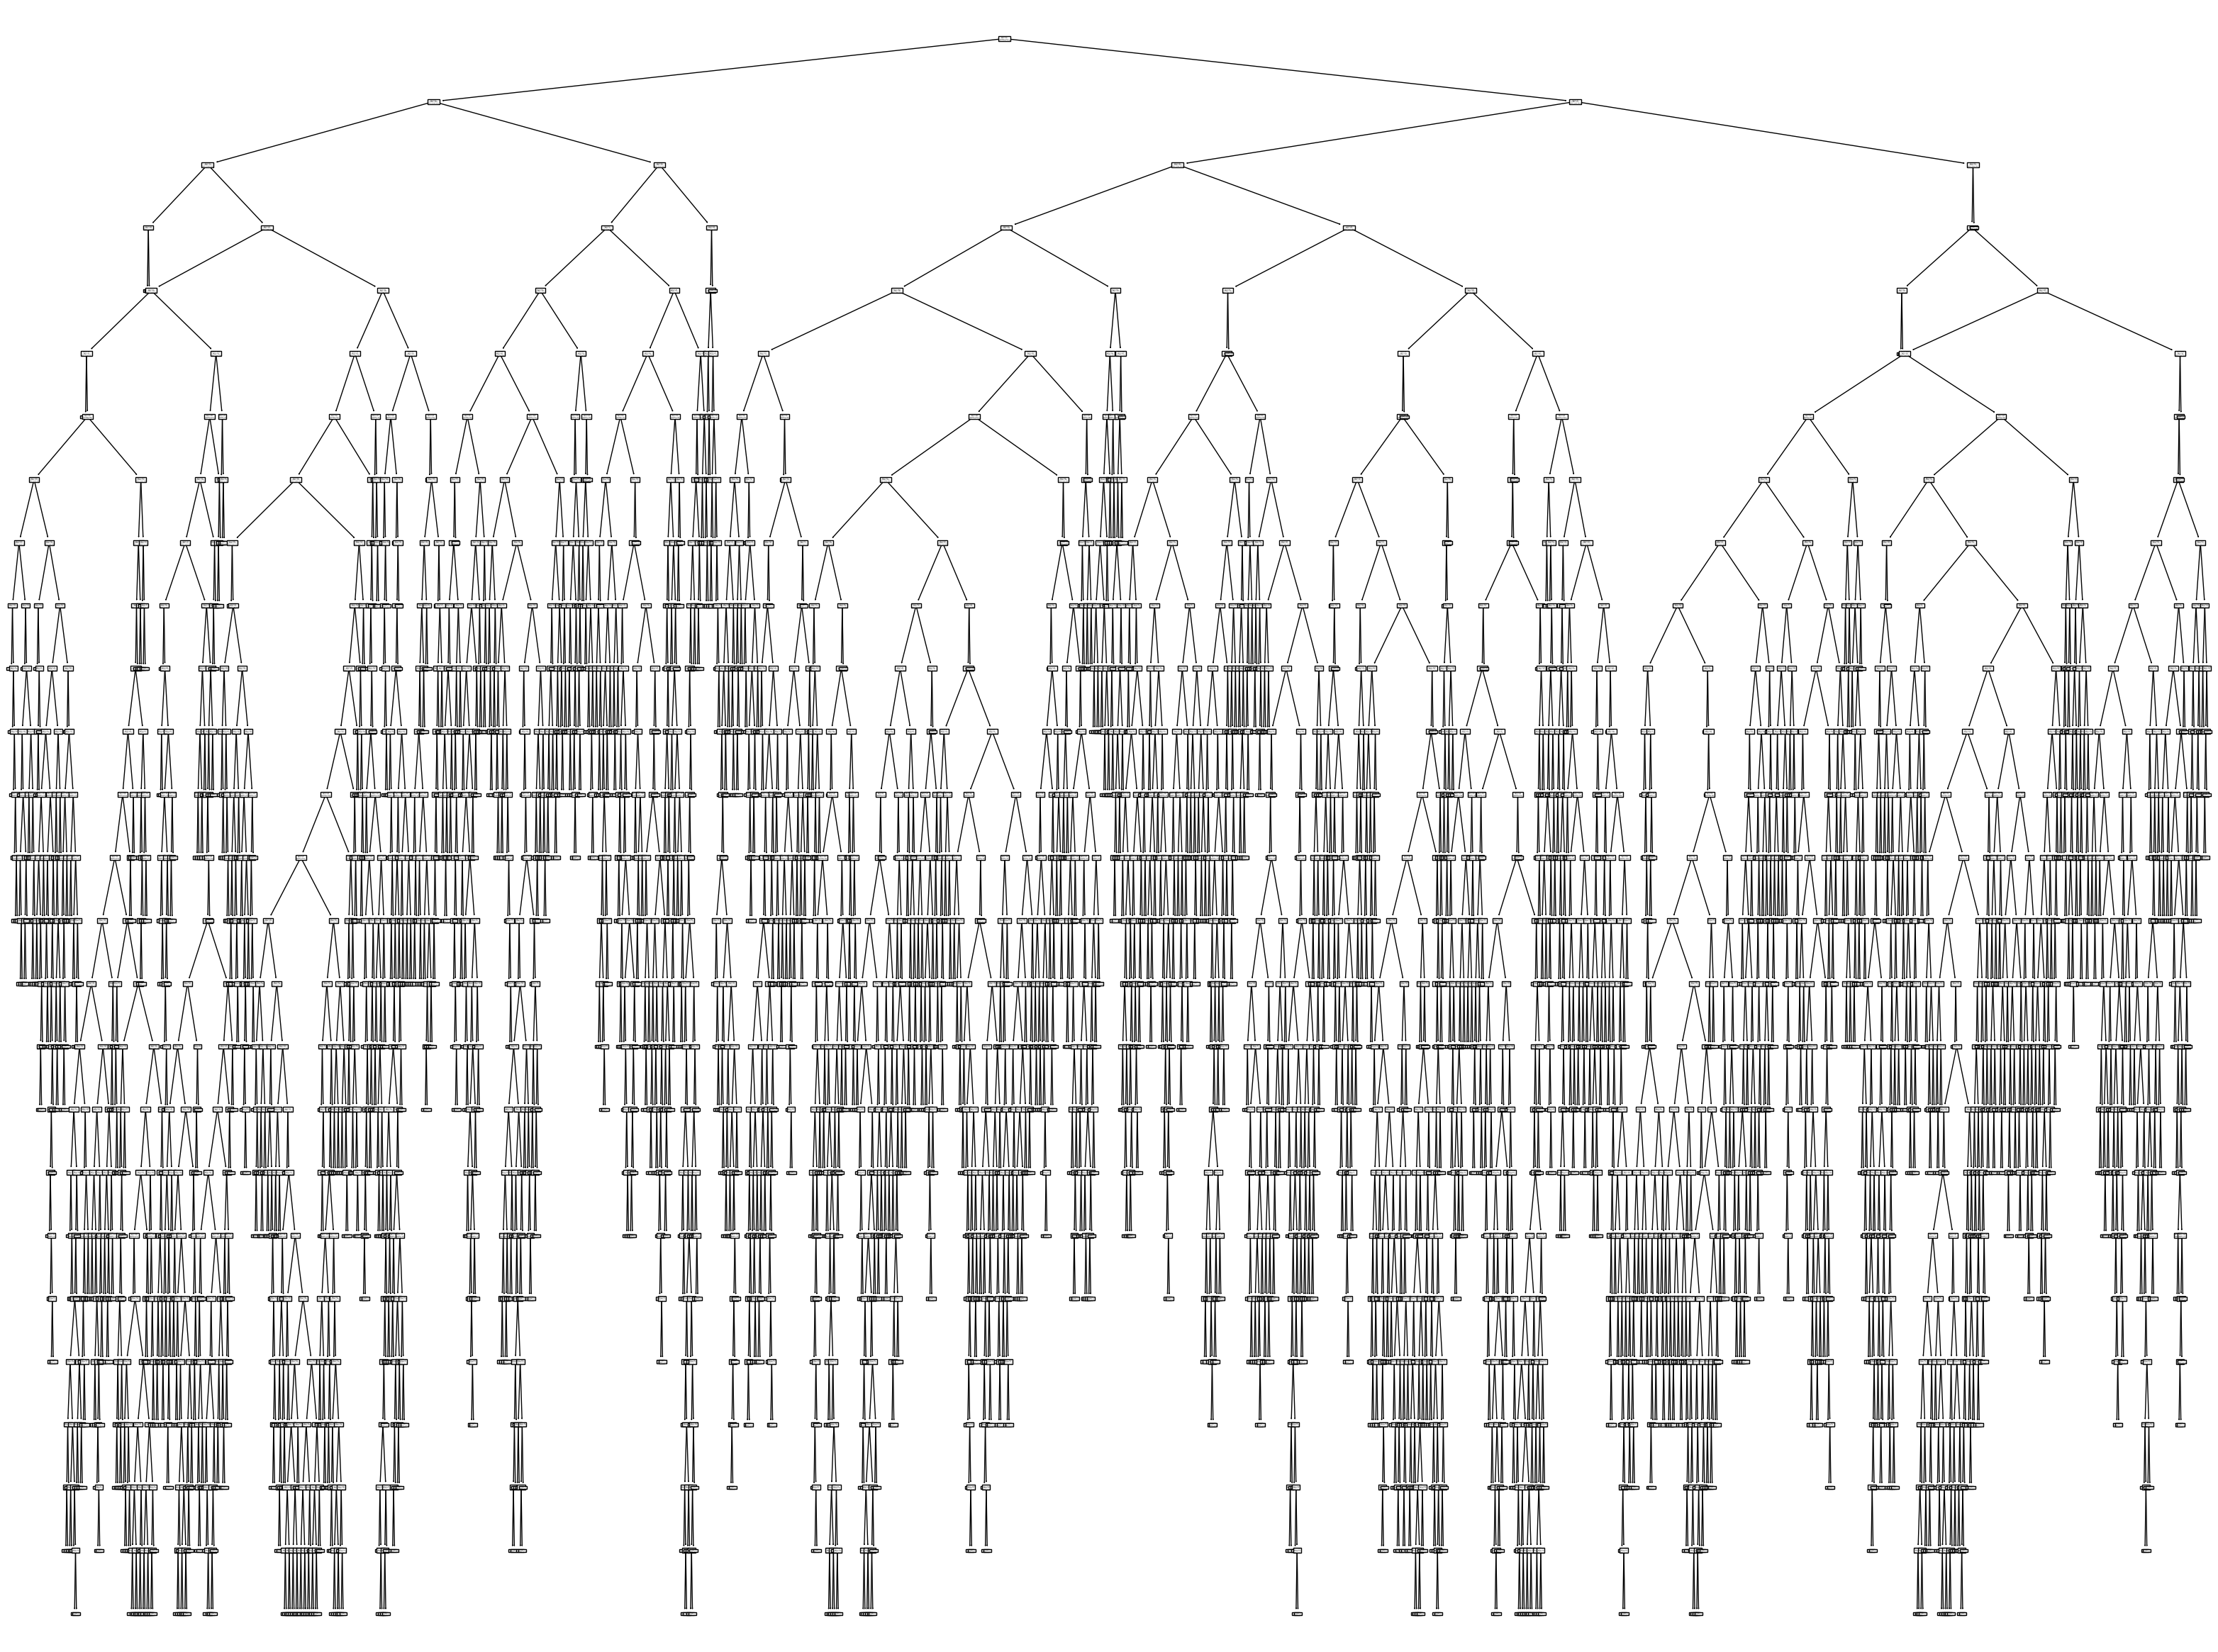

In [32]:
plt.figure(figsize=(40,30));

tr.plot_tree(dt_clf);

In [33]:
dt_y_train_pred = dt_clf.predict(dt_X_train)
dt_y_train_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
dt_train_metrics = calc_metrics('decision tree', dt_y_train, dt_y_train_pred)

In [35]:
dt_train_metrics

,ml_model,accuracy,precision,recall,f1_score
0,decision tree,0.998924,0.99949,0.998027,0.998758


### 2.6.2 Validation

In [36]:
dt_X_val = X_val.loc[:, dt_features]
dt_y_val = y_val.values

In [37]:
dt_y_val_pred = dt_clf.predict(dt_X_val)
dt_y_val_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
dt_val_metrics = calc_metrics('decision tree', dt_y_val, dt_y_val_pred)
dt_val_metrics

,ml_model,accuracy,precision,recall,f1_score
0,decision tree,0.945301,0.934377,0.939788,0.937074


### 2.6.3 Test

In [39]:
dt_X_test = X_test.loc[:, dt_features]
dt_y_test = y_test.values

In [40]:
dt_y_test_pred = dt_clf.predict(dt_X_test)
dt_y_test_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [41]:
dt_test_metrics = calc_metrics('decision tree', dt_y_test, dt_y_test_pred)
dt_test_metrics

,ml_model,accuracy,precision,recall,f1_score
0,decision tree,0.945159,0.937759,0.937264,0.937511


## 2.7 Random Forest

### 2.7.1 Training

In [42]:
rf_features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

rf_label = y_train

rf_X_train = X_train.loc[:, rf_features]
rf_y_train = rf_label.values

In [43]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [46]:
param_dist = {'n_estimators': randint(0,100),
              'max_depth': randint(1,50)} 

rfc_search = RandomForestClassifier()

rand_search = RandomizedSearchCV(rfc_search, 
                                 param_distributions = param_dist, 
                                 n_iter=50, 
                                 scoring=scoring,
                                 refit='accuracy',
                                 cv=5)


# Training
rand_search.fit(rf_X_train, rf_y_train.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C07FEABA50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C07BA6A890>},
                   refit='accuracy',
                   scoring=['accuracy', 'precision', 'recall', 'f1'])

In [48]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 43, 'n_estimators': 72}


In [49]:
# Define model
# After using RandomizedSearchCV, it was found that the best parameters were {'max_depth': 43, 'n_estimators': 72}
rfc = RandomForestClassifier(max_depth= 43, n_estimators= 72)

# training
rfc.fit(rf_X_train, rf_y_train.ravel())

RandomForestClassifier(max_depth=43, n_estimators=72)

In [50]:
rf_y_train_pred = rfc.predict(rf_X_train)

In [51]:
rfc_train_metrics = calc_metrics('random forest', rf_y_train, rf_y_train_pred)
rfc_train_metrics

,ml_model,accuracy,precision,recall,f1_score
0,random forest,0.999972,1.0,0.999936,0.999968


### 2.7.2 Validation

In [52]:
rf_X_val = X_val.loc[:, dt_features]
rf_y_val = y_val.values

In [53]:
rf_y_val_pred = rfc.predict(rf_X_val)

In [54]:
rfc_val_metrics = calc_metrics('random forest', rf_y_val, rf_y_val_pred)
rfc_val_metrics

,ml_model,accuracy,precision,recall,f1_score
0,random forest,0.962676,0.972587,0.940382,0.956213


### 2.7.3 Test

In [55]:
rf_X_test = X_test.loc[:, dt_features]
rf_y_test = y_test.values

In [56]:
rf_y_test_pred = rfc.predict(rf_X_test)

In [57]:
rfc_test_metrics = calc_metrics('random forest', rf_y_test, rf_y_test_pred)
rfc_test_metrics

,ml_model,accuracy,precision,recall,f1_score
0,random forest,0.962693,0.972124,0.942015,0.956833


## 2.8 Logistic Regression

### 2.8.1 Training

In [60]:
lr_features = ['customer_type', 'age', 'class', 'flight_distance',
       'inflight_wifi_service', 'departure_arrival_time_convenient',
       'ease_of_online_booking', 'gate_location', 'food_and_drink',
       'online_boarding', 'seat_comfort', 'inflight_entertainment',
       'on_board_service', 'leg_room_service', 'baggage_handling',
       'checkin_service', 'inflight_service', 'cleanliness',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel',
       'type_of_travel_personal_travel']

lr_label = y_train

lr_X_train = X_train.loc[:, lr_features]
lr_y_train = lr_label.values

In [132]:
# Defining Logistic Regression model 
lr_model = LogisticRegression( max_iter=200)

In [133]:
lr_model.fit( lr_X_train, lr_y_train.ravel())

LogisticRegression(max_iter=200)

In [138]:
lr_y_train_pred = lr_model.predict(lr_X_train)

In [139]:
lr_train_metrics = calc_metrics('logistic regression', lr_y_train, lr_y_train_pred)
lr_train_metrics

,ml_model,accuracy,precision,recall,f1_score
0,logistic regression,0.87524,0.870657,0.836388,0.853178


### 2.8.2 Validation

In [145]:
lr_X_val = X_val.loc[:, lr_features]
lr_y_val = y_val.values

In [146]:
lr_y_val_pred = lr_model.predict(lr_X_val)

In [147]:
lr_val_metrics = calc_metrics('logistic regression', lr_y_val, lr_y_val_pred)
lr_val_metrics

,ml_model,accuracy,precision,recall,f1_score
0,logistic regression,0.873902,0.868783,0.835177,0.851649


### 2.8.3 Test

In [148]:
lr_X_test = X_test.loc[:, lr_features]
lr_y_test = y_test.values

In [149]:
lr_y_test_pred = lr_model.predict(lr_X_test)

In [150]:
lr_test_metrics = calc_metrics('logistic regression', lr_y_test, lr_y_test_pred)
lr_test_metrics

,ml_model,accuracy,precision,recall,f1_score
0,logistic regression,0.87178,0.868665,0.833964,0.850961


# 3.0 Comparing results

## 3.1 Training results

In [157]:
train_results = pd.concat([knn_metrics, dt_train_metrics, rfc_train_metrics, lr_train_metrics])
round(train_results, 3)

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.957,0.973,0.926,0.949
0,decision tree,0.999,0.999,0.998,0.999
0,random forest,1.000,1.000,1.000,1.000
0,logistic regression,0.875,0.871,0.836,0.853


## 3.2 Validation results

In [155]:
val_results = pd.concat([knn_val_metrics, dt_val_metrics, rfc_val_metrics, lr_val_metrics])
round(val_results, 3)

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.924,0.943,0.877,0.909
0,decision tree,0.945,0.934,0.940,0.937
0,random forest,0.963,0.973,0.940,0.956
0,logistic regression,0.874,0.869,0.835,0.852


## 3.3 Test results

In [156]:
test_results = pd.concat([knn_test_metrics, dt_test_metrics, rfc_test_metrics, lr_test_metrics])
round(test_results, 3)

,ml_model,accuracy,precision,recall,f1_score
0,knn,0.925,0.943,0.882,0.911
0,decision tree,0.945,0.938,0.937,0.938
0,random forest,0.963,0.972,0.942,0.957
0,logistic regression,0.872,0.869,0.834,0.851
